In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import random
import tensorflow as tf

import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization

from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
new_def = pd.DataFrame(columns = ["label", "matrice"])
new_def

,label,matrice


In [5]:
for x in range(len(df)) :
    new_def.loc[x,"label"] = df.loc[x,"label"]
    new_def.loc[x,"matrice"] = np.reshape(df.loc[x,"pixel0":"pixel783"].values/255.0,(28, 28))

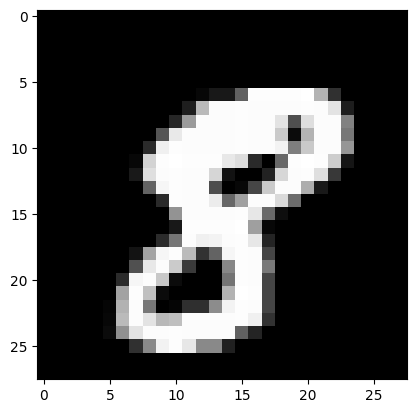

In [6]:
plt.imshow(new_def.loc[10, "matrice"], cmap = 'gray', interpolation = 'nearest')

In [7]:
x = new_def["matrice"].values
y = new_def["label"].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 40)

x_train = np.array(x_train.tolist())
x_train = x_train.reshape(-1, 28, 28, 1)
y_train = np.array(y_train, dtype = np.int32)
y_train = to_categorical(y_train, num_classes = 10)

x_test = np.array(x_test.tolist())
x_test = x_test.reshape(-1, 28, 28, 1)
y_test = np.array(y_test, dtype = np.int32)
y_test = to_categorical(y_test, num_classes = 10)

In [8]:
model = Sequential([
    Conv2D(input_shape = (28, 28, 1), filters = 32, kernel_size = (2, 2), padding = 'same', activation = 'relu'), MaxPooling2D(),
    Conv2D(64, kernel_size = (2, 2), padding = 'same', activation = 'relu'), MaxPooling2D(),
    Conv2D(128, kernel_size = (2, 2), padding = 'same', activation = 'relu'), MaxPooling2D(),
    Conv2D(256, kernel_size = (2, 2), padding = 'same', activation = 'relu'), MaxPooling2D(pool_size = (1, 1)), BatchNormalization(),
    Conv2D(512, kernel_size = (2, 2), padding = 'same', activation = 'relu'), MaxPooling2D(pool_size = (1, 1)),
    Flatten(name = 'flatten'),
    Dense(10, activation = 'softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        160       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        8256      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 128)         32896     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 3, 3, 128)         0

In [9]:
model.compile(optimizer = 'Adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [10]:
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 4, restore_best_weights = True)

In [11]:
history = model.fit(x_train, y_train, epochs = 50, batch_size = 32, validation_data = (x_test, y_test), callbacks = [early_stopping])

Epoch 1/50
919/919 [==============================] - 55s 58ms/step - loss: 0.1577 - accuracy: 0.9498 - val_loss: 0.0834 - val_accuracy: 0.9737
Epoch 2/50
919/919 [==============================] - 53s 57ms/step - loss: 0.0673 - accuracy: 0.9788 - val_loss: 0.1115 - val_accuracy: 0.9690
Epoch 3/50
919/919 [==============================] - 53s 57ms/step - loss: 0.0478 - accuracy: 0.9849 - val_loss: 0.0766 - val_accuracy: 0.9770
Epoch 4/50
919/919 [==============================] - 53s 57ms/step - loss: 0.0390 - accuracy: 0.9870 - val_loss: 0.0678 - val_accuracy: 0.9842
Epoch 5/50
919/919 [==============================] - 52s 57ms/step - loss: 0.0327 - accuracy: 0.9900 - val_loss: 0.0824 - val_accuracy: 0.9810
Epoch 6/50
919/919 [==============================] - 53s 57ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.0662 - val_accuracy: 0.9855
Epoch 7/50
919/919 [==============================] - 53s 57ms/step - loss: 0.0270 - accuracy: 0.9918 - val_loss: 0.0787 - val_accuracy:

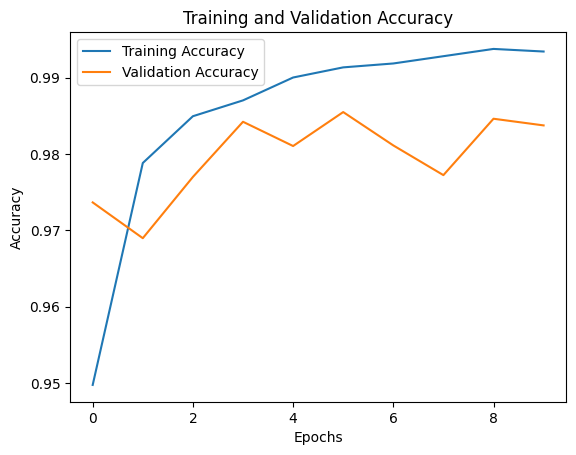

In [12]:
plt.plot(history.history['accuracy'], label = 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label = 'Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

In [13]:
new = pd.DataFrame(columns = ['Matrix'])
for x in range(len(df)) :
    new.loc[x,"Matrix"] = np.reshape(df.loc[x,"pixel0":"pixel783"].values/255.0,(28, 28))
x = new["Matrix"].values
x_test = np.array(x.tolist())
x_test = x_test.reshape(-1, 28, 28, 1)

In [14]:
predictions = model.predict(x_test)
predictions = np.argmax(predictions, axis = 1)
predictions

1313/1313 [==============================] - 15s 11ms/step


array([1, 0, 1, ..., 7, 6, 9])

In [15]:
final = pd.DataFrame(columns = ["Matrice", "Label"])
final["Label"] = predictions
for i in range(len(final)) :
    final.loc[i, "Matrice"] = int(i + 1)
final = final.set_index("Matrice")

In [16]:
submission = pd.read_csv("/kaggle/input/digit-recognizer/sample_submission.csv")
submission = final
submission.to_csv('final_submission.csv', index = False)